# Importing the Data

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical market data for the last 5 years
nifty50_data = yf.download("^NSEI", period="5y")

[*********************100%%**********************]  1 of 1 completed


In [2]:
Bin_Yearly = nifty50_data['Adj Close'].pct_change(periods=252) * 100
Bin50_Day = nifty50_data['Adj Close'].rolling(window=50).mean()
Bin200_Day = nifty50_data['Adj Close'].rolling(window=200).mean()

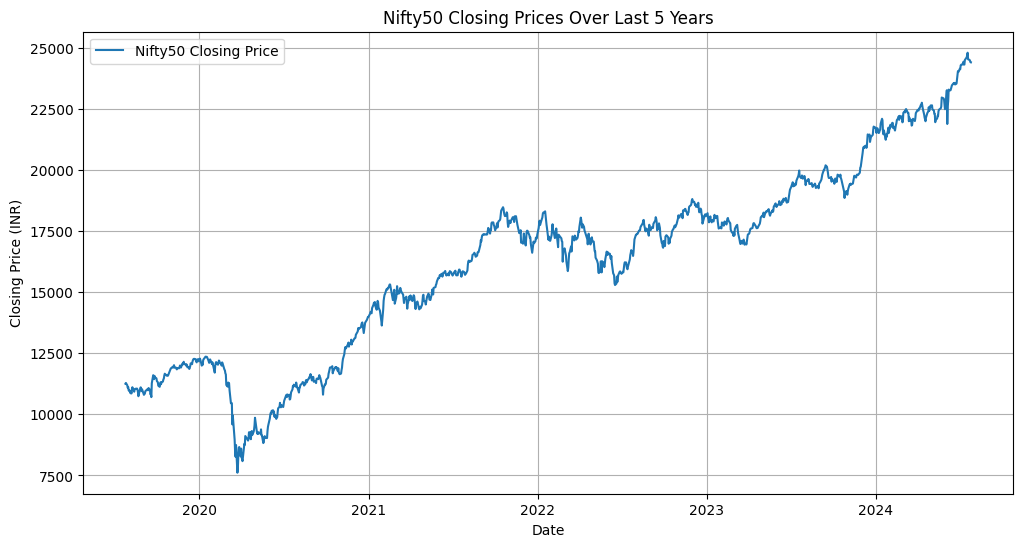

In [3]:
# Perform a simple analysis - plot the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(nifty50_data.index, nifty50_data['Close'], label='Nifty50 Closing Price')
plt.title('Nifty50 Closing Prices Over Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# # Moving Average Graph
# plt.figure(figsize=(12, 6))
# plt.plot(nifty50_data.index, nifty50_data['Close'], label='Nifty50 Closing Price')
# plt.plot(nifty50_data.index, nifty50_data['50-Day MA'], label='50-Day Moving Average')
# plt.plot(nifty50_data.index, nifty50_data['200-Day MA'], label='200-Day Moving Average')
# plt.title('Nifty50 Closing Prices with 50-Day and 200-Day Moving Averages')
# plt.xlabel('Date')
# plt.ylabel('Closing Price (INR)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [7]:
# # Yearly Returns Graph

# plt.figure(figsize=(12, 6))
# plt.plot(nifty50_data.index, nifty50_data['Yearly Return'], label='Nifty50 Yearly Return')
# plt.title('Nifty50 Yearly Returns Over Last 5 Years')
# plt.xlabel('Date')
# plt.ylabel('Yearly Return (%)')
# plt.legend()
# plt.grid(True)
# plt.show()

## Cleaning and Pre processing

In [6]:
if 'Dividends' in nifty50_data.columns and 'Stock Splits' in nifty50_data.columns:
    nifty50_data = nifty50_data.drop(columns=['Dividends', 'Stock Splits', 'Close'])

In [7]:
nifty50_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
nifty50_data.drop(columns=['Close'], inplace=True)

In [17]:
# nifty50_data = nifty50_data.drop(columns=['50-Day MA', '200-Day MA', 'Yearly Return'])

# nifty50_data.fillna({
#     '50-Day MA': nifty50_data['50-Day MA'].median(),
#     '200-Day MA': nifty50_data['200-Day MA'].median(),
#     'Yearly Return': nifty50_data['Yearly Return'].median()
# }, inplace=True)


Creating 3 bins, 50-Day Average, 200-Day Average, Yearly-Average

In [9]:
Bin50_Day.fillna(Bin50_Day.mode()[0], inplace=True)
Bin200_Day.fillna(Bin200_Day.mode()[0], inplace=True)
Bin_Yearly.fillna(Bin_Yearly.mode()[0], inplace=True)

In [10]:
def showIndexGraphs():
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))
    
    # Plotting the Histogram
    axes[0].plot(Bin50_Day, label='50-Day MA', color='orange')
    axes[0].plot(Bin200_Day, label='200-Day MA', color='blue')
    axes[0].set_title('20-Day & 50-DayMoving Average Trend Line')
    axes[0].set_ylabel('Year')
    axes[0].set_xlabel('Value')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].plot(Bin_Yearly)
    axes[1].set_title('Yearly Returns Trend Line')
    axes[0].set_xlabel('Year')
    axes[1].set_ylabel('Returns %')
    axes[1].grid(True)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


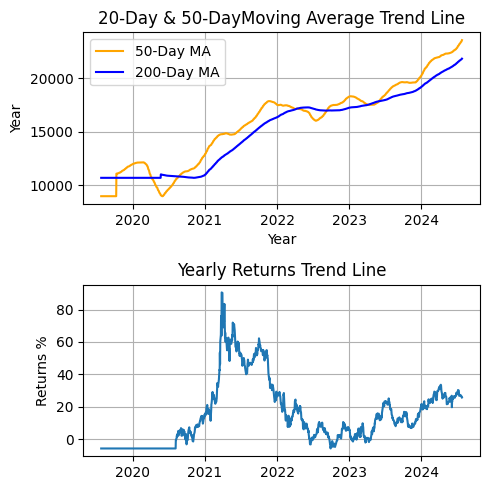

In [11]:
showIndexGraphs()

In [12]:
nifty50_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-25,11290.400391,11361.400391,11239.349609,11252.150391,11252.150391,553700
2019-07-26,11247.450195,11307.599609,11210.049805,11284.299805,11284.299805,522700
2019-07-29,11307.500000,11310.950195,11152.400391,11189.200195,11189.200195,482900
2019-07-30,11213.700195,11267.450195,11072.650391,11085.400391,11085.400391,479100
2019-07-31,11034.049805,11145.299805,10999.400391,11118.000000,11118.000000,536700


Normalizing the Dataset

In [13]:
import numpy as np

nifty_open_scaled = (nifty50_data['Open'] - np.min(nifty50_data['Open'])) / (np.max(nifty50_data['Open']) - np.min(nifty50_data['Open']))
nifty_adjclose_scaled = (nifty50_data['Adj Close'] - np.min(nifty50_data['Adj Close'])) / (np.max(nifty50_data['Adj Close']) - np.min(nifty50_data['Adj Close']))
nifty_high_scaled = (nifty50_data['High'] - np.min(nifty50_data['High'])) / (np.max(nifty50_data['High']) - np.min(nifty50_data['High']))
nifty_low_scaled = (nifty50_data['Low'] - np.min(nifty50_data['Low'])) / (np.max(nifty50_data['Low']) - np.min(nifty50_data['Low']))
nifty_volume_scaled = (nifty50_data['Volume'] - np.min(nifty50_data['Volume'])) / (np.max(nifty50_data['Volume']) - np.min(nifty50_data['Volume']))


In [14]:
nifty50_data_df = pd.DataFrame({'open_scaled': nifty_open_scaled, 'high_scaled': nifty_high_scaled, 
                            'adj_close_scaled': nifty_adjclose_scaled, 'low_scaled': nifty_low_scaled,
                              'volume_scaled': nifty_volume_scaled})

In [15]:
nifty50_data_df

,open_scaled,high_scaled,adj_close_scaled,low_scaled,volume_scaled
Date,,,,,
2019-07-25,0.207683,0.197674,0.211854,0.218326,0.305743
2019-07-26,0.205174,0.194475,0.213724,0.216610,0.288625
2019-07-29,0.208682,0.194674,0.208192,0.213234,0.266648
2019-07-30,0.203202,0.192088,0.202154,0.208564,0.264550
2019-07-31,0.192708,0.184824,0.204050,0.204274,0.296356
...,...,...,...,...,...
2024-07-19,1.000000,1.000000,0.984297,0.995344,0.189840
2024-07-22,0.976163,0.984564,0.983037,0.986804,0.179017
2024-07-23,0.983357,0.983812,0.981281,0.969932,0.240972


Building DNN Model